<a href="https://colab.research.google.com/github/chrisnaandanu/git-testing/blob/master/The_Ultimate_Beginners_Guide_to_Fuzzy_Logic_Tipping_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Ultimate Beginners Guide to Fuzzy Logic: Tipping problem

**Antecedents (inputs)**

Service: how would you rate the service? (0-10)
- bad, decent, great

Food: how would you rate the food? (0-10)
- bad, decent, great

**Consequents (outputs)**

Tip: how much tip would you give? (0-20)
- low, medium, high

Rules
- If food quality is *bad* or service quality is *bad* then the tip will be *low*
- If service quality is *decent* then the tip will be *medium*
- If service quality is *great* and food quality is *great* then the tip will be *high*


# Installing and importing the libraries

- Documentation: https://pythonhosted.org/scikit-fuzzy/overview.html

In [ ]:
!pip install scikit-fuzzy
#!pip install scikit-fuzzy==0.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Antecedents and consequent

In [ ]:
np.arange(0, 11, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')

In [ ]:
food

Antecedent: food

In [ ]:
food.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
service

Antecedent: service

In [ ]:
service.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
tip = ctrl.Consequent(np.arange(0, 21, 1), 'tip')

In [ ]:
tip

Consequent: tip

In [ ]:
tip.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

## Membership functions

In [ ]:
food.automf(number = 3, names = ['bad', 'decent', 'great'])
service.automf(number = 3, names = ['bad', 'decent', 'great'])

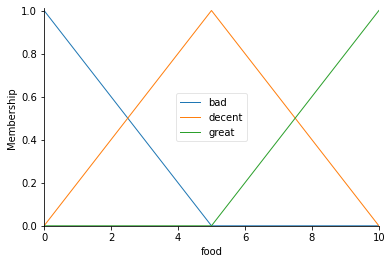

In [ ]:
food.view()

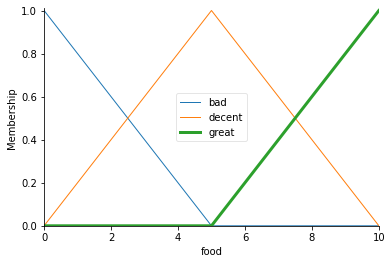

In [ ]:
food['great'].view()

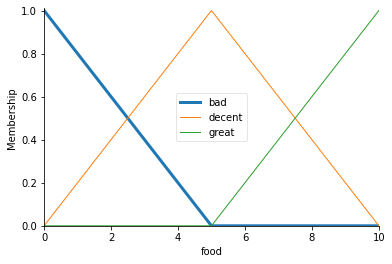

In [ ]:
food['bad'].view()

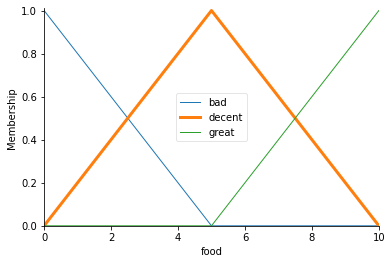

In [ ]:
food['decent'].view()

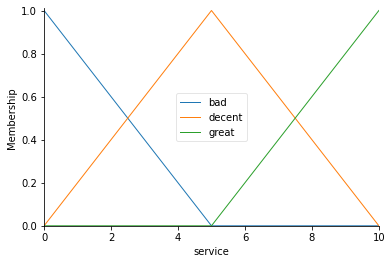

In [ ]:
service.view()

In [ ]:
tip.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

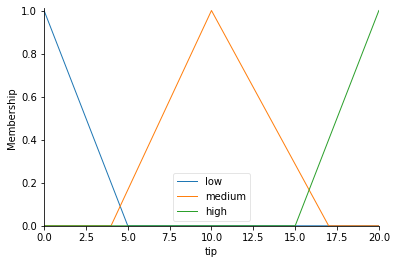

In [ ]:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 5])
tip['medium'] = fuzz.trimf(tip.universe, [4, 10, 17])
tip['high'] = fuzz.trimf(tip.universe, [15, 20, 20])
tip.view()

In [ ]:
rule1 = ctrl.Rule(food['bad'] | service['bad'], tip['low'])
rule2 = ctrl.Rule(service['decent'], tip['medium'])
rule3 = ctrl.Rule(service['great'] | food['great'], tip['high'])

## Control system

In [ ]:
control_system = ctrl.ControlSystem([rule1, rule2, rule3])

In [ ]:
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

In [ ]:
fuzzy_system.input['food'] = 6.5
fuzzy_system.input['service'] = 7.5
fuzzy_system.compute()

12.443243243243247


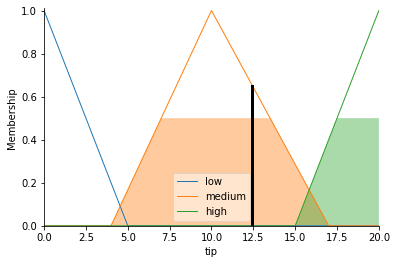

In [ ]:
print(fuzzy_system.output['tip'])
tip.view(sim = fuzzy_system)

# Other functions

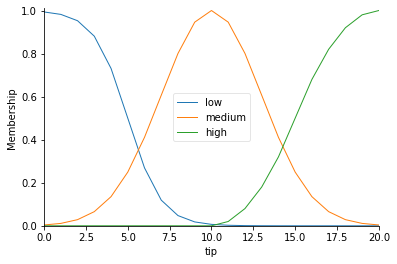

In [ ]:
tip['low'] = fuzz.sigmf(tip.universe, 5, -1)
tip['medium'] = fuzz.gaussmf(tip.universe, 10, 3)
tip['high'] = fuzz.pimf(tip.universe, 10, 20, 20, 21)
tip.view()

In [ ]:
rule1 = ctrl.Rule(food['bad'] | service['bad'], tip['low'])
rule2 = ctrl.Rule(service['decent'], tip['medium'])
rule3 = ctrl.Rule(service['great'] | food['great'], tip['high'])

In [ ]:
control_system = ctrl.ControlSystem([rule1, rule2, rule3])

In [ ]:
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

In [ ]:
fuzzy_system.input['food'] = 10
fuzzy_system.input['service'] = 10
fuzzy_system.compute()

17.06666666666667


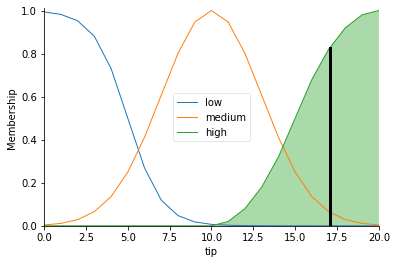

In [ ]:
print(fuzzy_system.output['tip'])
tip.view(sim = fuzzy_system)